In [10]:
import tensorflow as tf
from tensorflow import keras
import resnet_V2
import matplotlib.pyplot as plt
from tqdm import tqdm
import data_util

In [11]:
input_size = 256
batch_size = 32

drop_ae = resnet_V2.ResNetAE(drop_out=0.5)
ae = resnet_V2.ResNetAE(drop_out=0.5)

In [12]:
temp_input = tf.random.normal(shape=(1, 256, 256, 3))
drop_ae(temp_input)
ae(temp_input)
print('good')

good


In [14]:
drop_ae.load_weights('pre_trained/model_4.ckpt')
# ae.load_weights('pre_trained/no_dropout_epcoh5.data-00000-of-00001')

In [15]:
train_ds, test_ds = data_util.get_autoencoder_dataset(batch_size=batch_size)

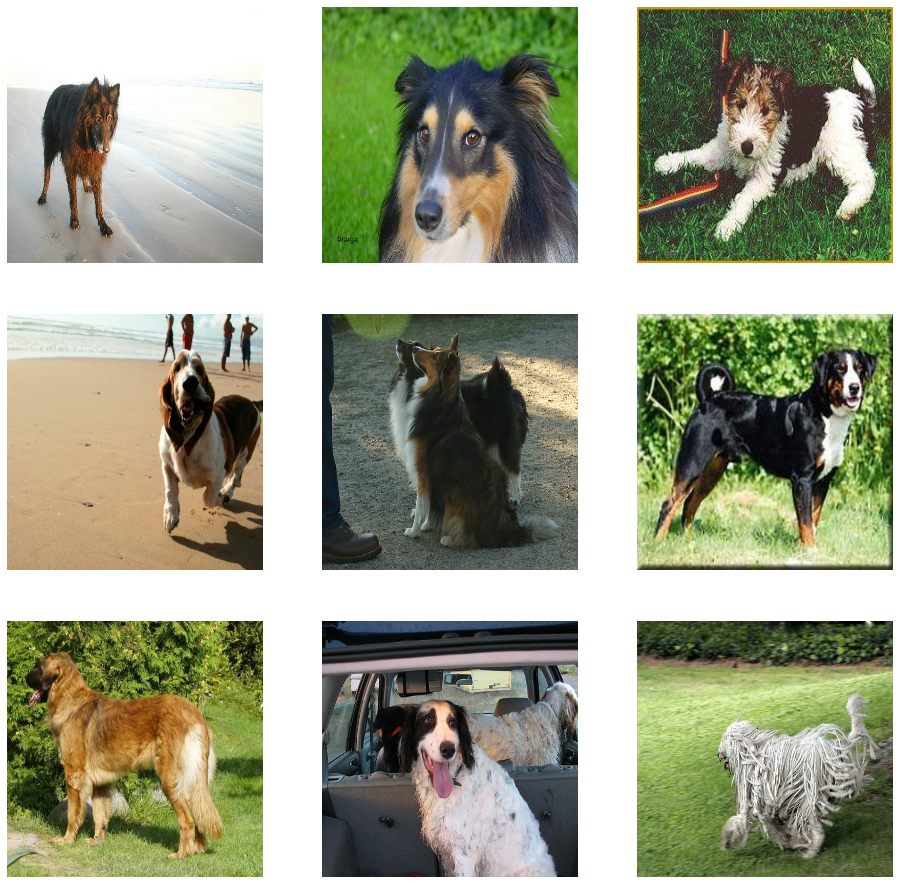

In [17]:
for images in test_ds.take(1):
    plt.figure(figsize=(16, 16))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis('off')

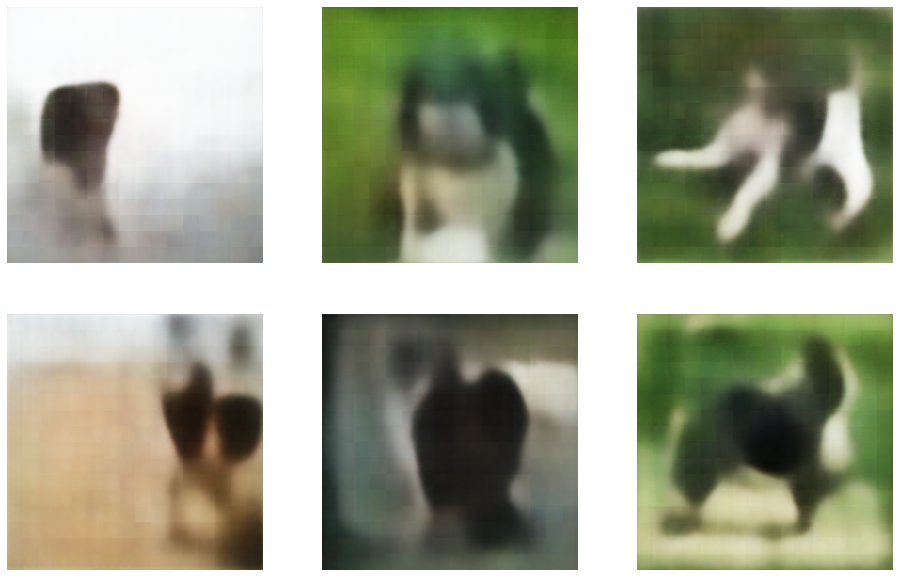

In [18]:
recon = drop_ae(images)
plt.figure(figsize=(16, 16))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(recon[i].numpy())
    plt.axis('off')